In [6]:
%matplotlib inline
import matplotlib
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, interpolate,fftpack



In [8]:
header = pd.read_csv('../datasets/slipperData/Alice.csv', nrows=1, header=None)
header = header.values[0]


In [10]:
#alice = pd.read_csv('data/slipperData/Alice.csv', nrows=5000,skiprows=400,names=header)
alice = pd.read_csv('../datasets/slipperData/Alice.csv', skiprows=1, names=header)

In [11]:
ts = alice['Timestamp'].values
ts_orig = ts - min(ts)
axis = [alice['Axis' + str(i+1)].values for i in range(3)]

In [12]:
fs = 33
ps = 1/fs
n = np.int16(8192)
freq = np.linspace(0, fs/2, num=int(n//2))
ts_new =  np.arange(min(ts_orig), max(ts_orig), ps)
axis_interpolant = [interpolate.interp1d(ts_orig, axis[i]) for i in range(3) ]
axis_new = [axis_interpolant[i](ts_new) for i in range(3) ]


In [13]:
axis_new = [axis_new[i] - np.mean(axis_new[i]) for i in range(3)]

NameError: name 'i' is not defined

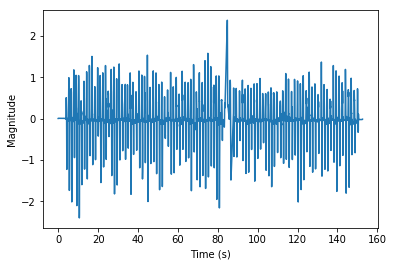

In [14]:
#corner_freq = 15
#b, a = signal.ellip(10, 0.01, 100, 2 * corner_freq / fs)
#axis_lpf = [signal.filtfilt(b, a, axis_new[i]) for i in range(3)]

filter_length = 5
win = np.ones(filter_length)
axis_lpf = [signal.convolve(axis_new[i], win, mode='same') / filter_length for i in range(3)]

plt.figure()
plt.plot(ts_new, axis_lpf[0])
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')
plt.title('Time Domain Signal (Axis ' + str(i + 1) + ')')
plt.grid()


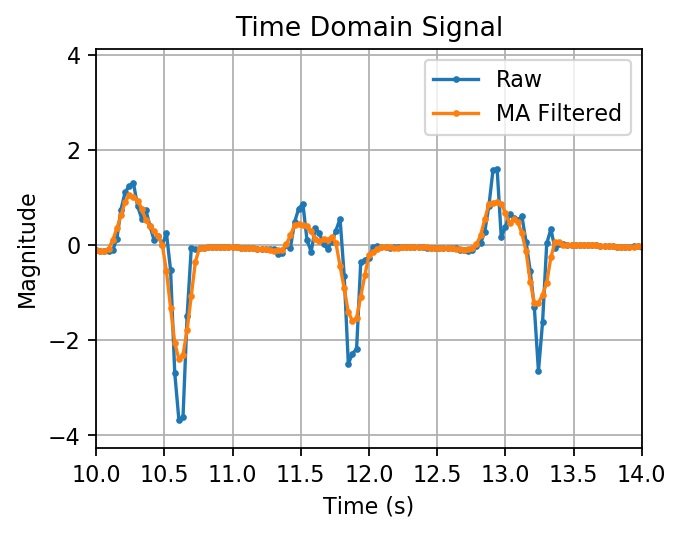

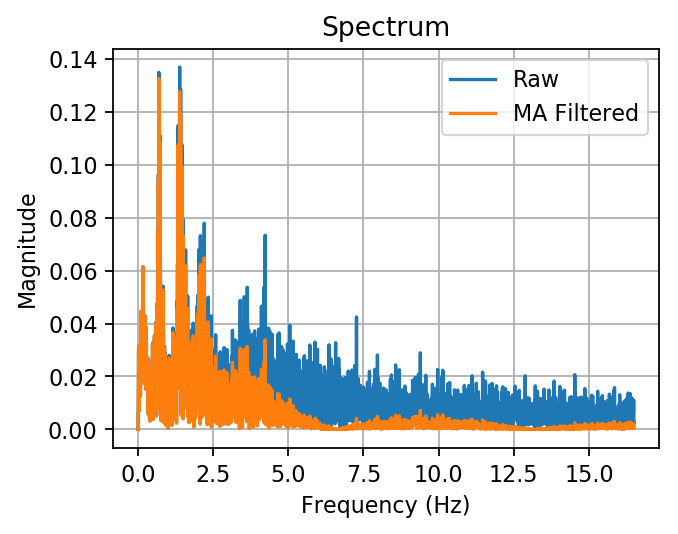

In [15]:
plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
h1, = plt.plot(ts_new, axis_new[0], 'o-', ms=2, label='Raw')
h2, = plt.plot(ts_new, axis_lpf[0], 'o-', ms=2, label='MA Filtered')
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')
plt.title('Time Domain Signal')
plt.grid()
plt.xlim(10,14)
plt.legend(handles=[h1, h2])
plt.savefig('TimeDomainAxis1_filtering.png')

freq = np.linspace(0, fs / 2, num=int(n // 2))
plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
spectrum_orig = fftpack.fft(axis_new[0], n=n) / len(axis_new[0])
spectrum_orig_ss = spectrum_orig[0:n // 2]
spectrum_orig_ss[2:] = 2 * spectrum_orig_ss[2:]
h1, = plt.plot(freq, np.abs(spectrum_orig[0:n // 2]), label='Raw')
spectrum = fftpack.fft(axis_lpf[0], n=n) / len(axis_lpf[0])
spectrum_ss = spectrum[0:n // 2]
spectrum_ss[2:] = 2 * spectrum_ss[2:]
freq = np.linspace(0, fs / 2, num=int(n // 2))
h2, = plt.plot(freq, np.abs(spectrum[0:n // 2]), label='MA Filtered')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum')
plt.legend(handles=[h1, h2])
plt.grid()
plt.savefig('Spectrum1.png')


In [19]:
search_order = 1
peaks_idx = np.array(signal.argrelmax(axis_lpf[0], order=search_order))
valleys_idx = np.array(signal.argrelmin(axis_lpf[0], order=search_order))

peaks_t = ts_new[peaks_idx]
valleys_t = ts_new[valleys_idx]
peaks = axis_lpf[0][peaks_idx]
valleys = axis_lpf[0][valleys_idx]

peaks_filt = np.nonzero(np.logical_and(peaks > 0.2, peaks < 4))
valleys_filt = np.nonzero(np.logical_and(valleys < -0.2, valleys > -4))

peaks_idx = peaks_idx[peaks_filt]
valleys_idx = valleys_idx[valleys_filt]
peaks_t = ts_new[peaks_idx]
valleys_t = ts_new[valleys_idx]
peaks = axis_lpf[0][peaks_idx]
valleys = axis_lpf[0][valleys_idx]


plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
plt.plot(ts_new, axis_lpf[0])
plt.plot(peaks_t, peaks, 'ro',ms=5)
plt.plot(valleys_t, valleys, 'go',ms=5)
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')
#plt.title('Time Domain Signal (Axis ' + str(i + 1) + ')')
plt.title('Time Domain Signal')
for i in range(5,13):
    plt.text(peaks_t[i], peaks[i], "A", fontsize=12)

for i in range(5,12):
    plt.text(valleys_t[i], valleys[i], "B", fontsize=12)
    
plt.grid()
plt.xlim(10,20)
plt.savefig('TimeDomainAxis1.png')



IndexError: arrays used as indices must be of integer (or boolean) type

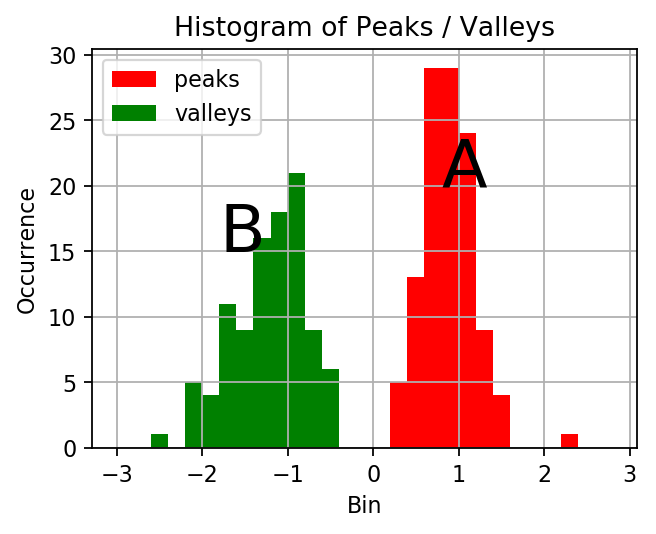

In [379]:
plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
plt.hist(peaks, bins = np.arange(0.2,3,0.2),color='red')
plt.hist(valleys, bins=np.arange(-3,-0.2,0.2),color='green')
plt.xlabel('Bin')
plt.ylabel('Occurrence')
#plt.title('Histogram of Peaks / Valleys (Axis ' + str(i + 1) + ')')
plt.title('Histogram of Peaks / Valleys')
plt.text(0.8, 20, "A",fontsize=30)
plt.text(-1.8, 15, "B",fontsize=30)

plt.grid()
plt.legend(['peaks', 'valleys'])
plt.savefig('Histogram1.png')